In [52]:
import pandas as pd
import numpy as np

In [53]:
df=pd.read_csv("Tweets.csv")

In [54]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [55]:
df=df[["text","airline_sentiment"]]

In [56]:
df.head()

text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative

In [57]:
df.shape

(14640, 2)

In [58]:
df.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [59]:
df.isnull().sum()

text                 0
airline_sentiment    0
dtype: int64

In [60]:
df.airline_sentiment.value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [61]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [62]:
data=df["airline_sentiment"]

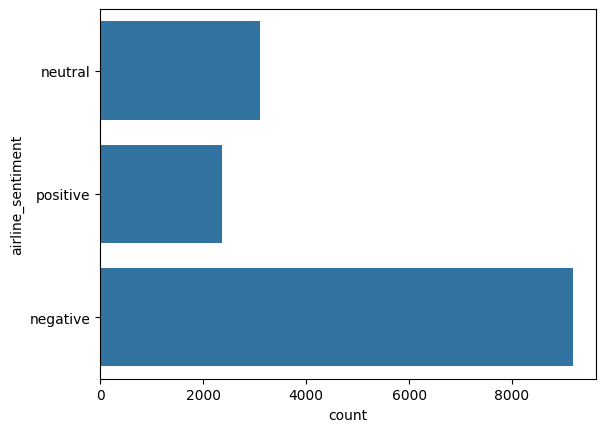

In [63]:
ax=sns.countplot(data)
plt.show()

In [64]:
LABELS=df.airline_sentiment.unique()

In [65]:
label_dict={}
for index,LABEL in enumerate(LABELS):
    label_dict[LABEL]=index

In [66]:
label_dict

{'neutral': 0, 'positive': 1, 'negative': 2}

In [67]:
df["airline_sentiment"]=df["airline_sentiment"].map(label_dict)

In [68]:
X=df.index.values
Y=df.airline_sentiment.values

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=100,
                                            stratify=df.airline_sentiment.values)

In [71]:
X_train.shape

(11712,)

In [72]:
X_val.shape

(2928,)

In [79]:
df["data_type"]=["not_set"]*df.shape[0]

In [80]:
df.head()

text  airline_sentiment  \
0                @VirginAmerica What @dhepburn said.                  0   
1  @VirginAmerica plus you've added commercials t...                  1   
2  @VirginAmerica I didn't today... Must mean I n...                  0   
3  @VirginAmerica it's really aggressive to blast...                  2   
4  @VirginAmerica and it's a really big bad thing...                  2   

  data_type  
0   not_set  
1   not_set  
2   not_set  
3   not_set  
4   not_set

In [74]:
df.loc[X_train,"data_type"]="train"
print(X_train)

[11740  5015 13952 ... 14507   426 11677]


In [75]:
df.loc[X_val,"data_type"]="val"
print(X_val)

[11488 12003  7586 ...  9410  5291  3717]


In [76]:
df.groupby(["airline_sentiment","data_type"]).count()

text
airline_sentiment data_type      
0                 train      2479
                  val         620
1                 train      1890
                  val         473
2                 train      7343
                  val        1835

In [77]:
from transformers import BertTokenizer

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [27]:
tokenizer=BertTokenizer.from_pretrained("bert-base-uncased")

In [28]:
max_length=df["text"].str.len().max()
max_length

186

In [29]:
encoded_train_text=tokenizer.batch_encode_plus(df[df["data_type"]=="train"].text.values,
                                        max_length=200,
                                        pad_to_max_length=True,
                                        add_special_tokens=True,
                                        return_attention_mask=True,
                                        return_token_type_ids=True,
                                        return_tensors="pt")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/joy/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [30]:
import torch

In [31]:
train_input_ids=torch.tensor(encoded_train_text["input_ids"])
train_attention_mask=torch.tensor(encoded_train_text["attention_mask"])
train_labels=torch.tensor(df[df["data_type"]=="train"].airline_sentiment.values)

/tmp/ipykernel_17798/350309463.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_input_ids=torch.tensor(encoded_train_text["input_ids"])
/tmp/ipykernel_17798/350309463.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_attention_mask=torch.tensor(encoded_train_text["attention_mask"])


In [32]:
print(train_input_ids.shape)
print(train_attention_mask.shape)
print(train_labels.shape)

torch.Size([11712, 200])
torch.Size([11712, 200])
torch.Size([11712])


In [33]:
encoded_val_text=tokenizer.batch_encode_plus(df[df["data_type"]=="val"].text.values,
                                            max_length=200,
                                            pad_to_max_length=True,
                                            return_attention_mask=True,
                                            add_special_tokens=True,
                                            return_token_type_ids=True,
                                            return_tensors="pt")

/home/joy/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [34]:
encoded_val_text

{'input_ids': tensor([[  101,  1030,  6261,  ...,     0,     0,     0],
        [  101,  1030,  6261,  ...,     0,     0,     0],
        [  101,  1030,  6261,  ...,     0,     0,     0],
        ...,
        [  101,  4067,  2017,  ...,     0,     0,     0],
        [  101,  1030, 25988,  ...,     0,     0,     0],
        [  101,  1030, 25988,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [35]:
val_input_ids=torch.tensor(encoded_val_text["input_ids"])
val_attention_mask=torch.tensor(encoded_val_text["attention_mask"])
val_labels=torch.tensor(df[df["data_type"]=="val"].airline_sentiment.values)

/tmp/ipykernel_17798/1941009371.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_input_ids=torch.tensor(encoded_val_text["input_ids"])
/tmp/ipykernel_17798/1941009371.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_attention_mask=torch.tensor(encoded_val_text["attention_mask"])


In [36]:
print(val_input_ids.shape)
print(val_attention_mask.shape)
print(val_labels.shape)

torch.Size([2928, 200])
torch.Size([2928, 200])
torch.Size([2928])


In [37]:
from torch.utils.data import TensorDataset

In [38]:
Train_dataset=TensorDataset(train_input_ids,
                           train_attention_mask,
                           train_labels)

Val_dataset=TensorDataset(val_input_ids,
                         val_attention_mask,
                         val_labels)

In [39]:
print(len(Train_dataset))
print(len(Val_dataset))

11712
2928


In [42]:
from torch.utils.data import DataLoader,RandomSampler

In [43]:
train_dataloader=DataLoader(Train_dataset,
                           batch_size=64,
                           sampler=RandomSampler(Train_dataset))

In [44]:
Train_dataset[100]

(tensor([  101,  1030,  6261, 14074, 14735,  4283,  2000,  2115,  5151, 16392,
          1011,  1046, 24316,  3626,  2040,  2333,  4020,  2000,  2131,  2033,
          2188,  2000,  2624,  3799,  3892,   999,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  

In [45]:
val_dataloader=DataLoader(Val_dataset,
                       batch_size=64,
                       sampler=RandomSampler(Val_dataset))

In [46]:
help(DataLoader)

Help on class DataLoader in module torch.utils.data.dataloader:

class DataLoader(typing.Generic)
 |  DataLoader(*args, **kwds)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Args:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler or Iterable, optional): defines the strategy to draw
 |          samples from the dataset. Can be any ``Iterable``

In [47]:
from transformers import BertForSequenceClassification

In [48]:
pretrained_model_name=BertForSequenceClassification.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

# Customized model creation

In [49]:
import torch.nn as nn

In [50]:
class sentiment_analysis_model(nn.Module):
    def __init__(self,pretrained_model_name,input_size,hidden_size,output_size):
        super(sentiment_analysis_model,self).__init__()
        #BERT model first layer
        self.bert_model= BertForSequenceClassification.from_pretrained(pretrained_model_name)
        
        #Additional Layers
        self.dropout=nn.Dropout(0.1)
        self.fc1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_size,output_size)
        self.softmax=nn.Softmax(dim=1)
        
    def forward(self,input_ids,attention_mask):
        #BERT forward pass
        outputs=self.bert_model(input_ids,attention_mask)
        
        #extract logits from bert output
        bert_logits=outputs.logits
        
        #Additional layers
        x=self.dropout(bert_logits)
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        x=self.softmax(x)
        
        return x

input_size=256
hidden_size=64
output_size=3

In [51]:
Model=sentiment_analysis_model(pretrained_model_name="bert-base-uncased",
                               input_size=input_size,
                               hidden_size=hidden_size,
                               output_size=output_size)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [52]:
#loss function
criterion=nn.CrossEntropyLoss()

In [53]:
#optimizer
from transformers import AdamW

2024-01-23 16:29:57.191484: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-23 16:29:57.289907: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-23 16:29:59.505753: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [54]:
optimizer=AdamW(Model.parameters(),
               lr=1e-6,
               eps=1e-5)

/home/joy/.local/lib/python3.8/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# Training Loop

In [1]:
epochs=10
for epoch in range(epochs):
    Model.train()
    for inputs,attention_mask,labels in train_dataloader:
        optimizer.zero_grad()
        outputs=Model(inputs,attention_mask)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step() 
    

    Model.eval()
    with torch.no_grad():
        val_loss=0.0
        correct=0
        total=0
        
        for val_inputs,val_labels in val_dataloader:
            val_outputs=Model(val_inputs)
            val_losses=criterion(val_outputs,val_labels)
            val_loss+=val_loss.item()
            
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Val Loss: {val_loss.item()}')

NameError: name 'Model' is not defined

In [3]:
def func(name,age):
    person=name+" "+age
    return person

In [4]:
obj=func("Joy","28")

In [5]:
print(obj)

Joy 28


In [12]:
def func2(number):
    if number%2==0:
        print("The number is Even")
    else:
        print("The number is odd")
        
ob=func2(20)

The number is Even


In [44]:
def func3(num):
    if num<18:
        print("Under 18.")
    else:
        print("Adult Person.")

In [45]:
ob3=func3(20)

Adult Person.


In [17]:
sum=0
for i in range (1,50):
    sum+=i
    
print(sum)

1225


In [24]:
def func4(n):
    sum=0
    for i in range(n):
        sum+=i 
    return sum

ob4=func4(20)
print(ob4)

190


In [26]:
def func4(n):
    sum = 0
    for i in range(n):
        
        sum += i
    return sum

ob4 = func4(20)
ob5=func4(30)
print(ob4)
print(ob5)

190
435


In [27]:
class name_class:
    def name_func(name):
        name="Joy"
        return name

In [31]:
class_obj=name_class()
print(class_obj.name_func())

Joy


In [29]:
print(class_obj)

In [50]:
class par:
    def __init__(self,age):
        self.age=age
        func3(self.age)

In [51]:
o=par(age=2)

Under 18.
